# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import math
%matplotlib inline

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# 1) FRESH: annual spending (m.u.) on fresh products (Continuous)
# 2) MILK: annual spending (m.u.) on milk products (Continuous)
# 3) GROCERY: annual spending (m.u.)on grocery products (Continuous)
# 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
# 7) CHANNEL: Customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
# 8) REGION: Customers  Region Lisbon, Oporto or Other (Nominal)

In [4]:
# Your code here:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
print("There are some outliers, but they are to be expected since the data referes to purchases by regions and depending on the region there are more customers")

There are some outliers, but they are to be expected since the data referes to purchases by regions and depending on the region there are more customers


In [17]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [18]:
print("There are some high correlation values but nothing over 90%")

There are some high correlation values but nothing over 90%


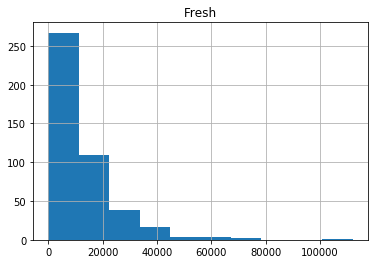

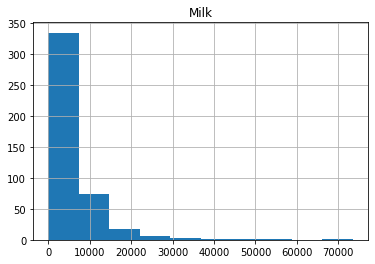

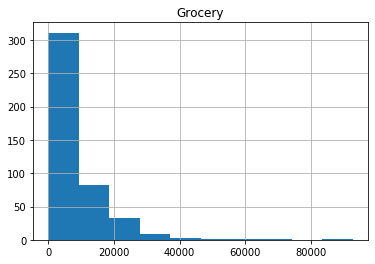

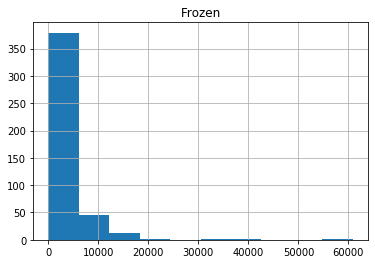

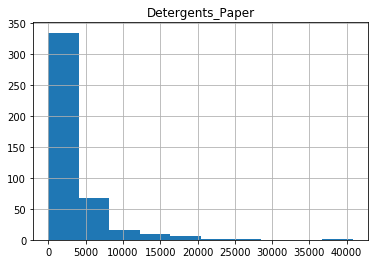

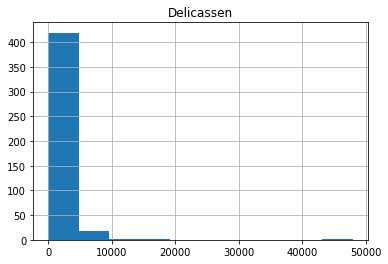

In [19]:
cols_analyze = customers.columns.drop(['Channel', 'Region'])
for c in cols_analyze:
    customers[c].hist()
    plt.title(c)
    plt.show()

In [11]:
print("All the fields are right skewed")

All the fields are right skewed


In [12]:
# Pareto Principle
breakpoint = math.ceil(len(customers)*0.8)
customers_80 = customers[0:breakpoint]
customers_20 = customers[breakpoint:]
for c in cols_analyze:
    print("20% Mean of", c, np.mean(customers_20[c]), "and 80% mean", np.mean(customers_80[c]))

20% Mean of Fresh 11327.96590909091 and 80% mean 12168.380681818182
20% Mean of Milk 4344.659090909091 and 80% mean 6159.167613636364
20% Mean of Grocery 5572.420454545455 and 80% mean 8545.991477272728
20% Mean of Frozen 3057.1363636363635 and 80% mean 3075.630681818182
20% Mean of Detergents_Paper 1539.840909090909 and 80% mean 3216.90625
20% Mean of Delicassen 1236.965909090909 and 80% mean 1596.846590909091


In [13]:
print("I don't think the pareto principle applies here.")

I don't think the pareto principle applies here.


In [14]:
# Your observations here
print("The dataset seems to be ready to be used.")

The dataset seems to be ready to be used.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [15]:
# Your comment here
print("I don't think the data needs any cleaning.")
print("All the categorical information is ready to be used and all the other fields are continuos data")
print("We could benefit from creating buckets for the values spent, but on the data side everything is clean.")

I don't think the data needs any cleaning.
All the categorical information is ready to be used and all the other fields are continuos data
We could benefit from creating buckets for the values spent, but on the data side everything is clean.


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [20]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

In [21]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [22]:
# Your code here:
customers_model = KMeans()
customers_model.fit(customers_scale)
customers['labels'] = customers_model.labels_

Count the values in `labels`.

In [23]:
# Your code here:
customers['labels'].value_counts()

0    223
2     99
4     42
5     40
7     28
1      5
3      2
6      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [24]:
from sklearn.cluster import DBSCAN 

In [25]:
# Your code here
customers_dbscan = DBSCAN(eps=0.5)
customers_dbscan.fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbscan.labels_

Count the values in `labels_DBSCAN`.

In [26]:
# Your code here
customers['labels_DBSCAN'].value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [27]:
bys = ['labels', 'labels_DBSCAN']

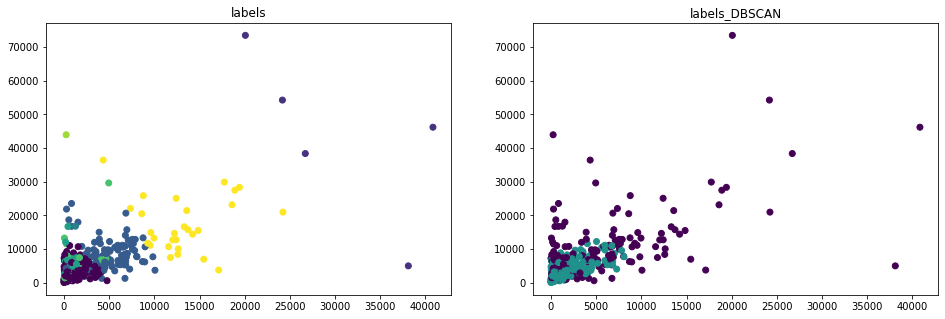

In [43]:
# Your code here:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
for i, b in enumerate(bys):
    plt.sca(axes[i])
    plt.title(b)
    axes[i] = plt.scatter('Detergents_Paper', 'Milk', c=b, data=customers)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

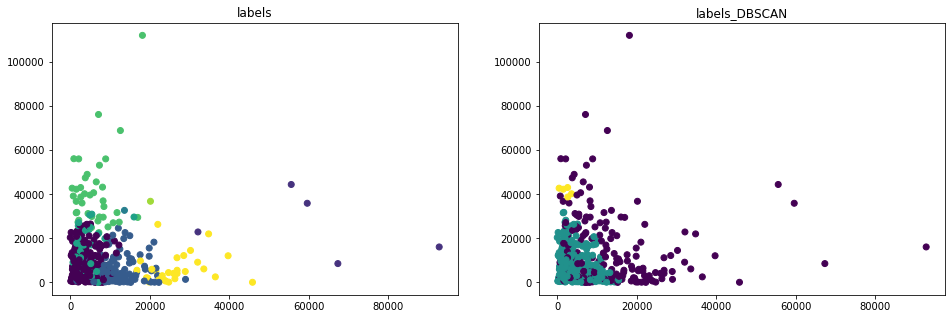

In [45]:
# Your code here:
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for i, b in enumerate(bys):
    plt.sca(axes2[i])
    plt.title(b)
    axes2[i] = plt.scatter('Grocery', 'Fresh', c=b, data=customers)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

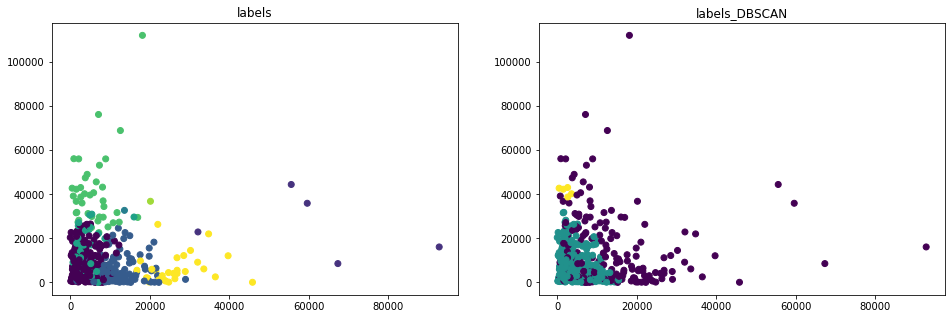

In [47]:
# Your code here:
fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for i, b in enumerate(bys):
    plt.sca(axes3[i])
    plt.title(b)
    axes3[i] = plt.scatter('Grocery', 'Fresh', c=b, data=customers)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [48]:
# Your code here:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.089686,2.506726,9237.663677,2564.103139,3313.372197,1744.013453,795.183857,914.511211,-0.107623
1,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,-1.000000
2,1.808081,2.626263,5950.101010,8759.767677,12811.232323,1605.191919,5135.696970,1707.858586,-0.575758
3,1.000000,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000,-1.000000
4,1.071429,2.523810,14810.190476,3658.261905,3895.071429,10039.333333,492.071429,1390.380952,-0.619048
5,1.150000,2.650000,40546.450000,4875.200000,6053.925000,4625.800000,1092.975000,2406.500000,-0.650000
6,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
7,2.000000,2.357143,6367.607143,17198.678571,26514.250000,1840.892857,13080.642857,2624.250000,-1.000000


In [49]:
customers.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.522989,2.551724,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,3.367816
0,1.195402,2.528736,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,0.643678
1,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,5.000000


Which algorithm appears to perform better?

In [50]:
# Your observations here
print("I think KMeans works better that DBSCAN, since a lot of points on the DBSCAN were detected as noise (-1)")

I think KMeans works better that DBSCAN, since a lot of points on the DBSCAN were detected as noise (-1)


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here